<a href="https://colab.research.google.com/github/IDE21/Healthcare-analysis/blob/main/Assignment_3_build_a_basic_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [ ]:
# Preprocess the data
x_train = X_train.reshape(-1,28,28,1)/255.0
x_test = X_test.reshape(-1,28,28,1)/255.0
X_train, X_test = np.array(X_train,), np.array(X_test)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)






## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [ ]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))






**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 38s 98ms/step - loss: 0.5519 - accuracy: 0.9254 - val_loss: 0.0906 - val_accuracy: 0.9736
Epoch 2/10
375/375 [==============================] - 40s 106ms/step - loss: 0.0680 - accuracy: 0.9795 - val_loss: 0.0667 - val_accuracy: 0.9786
Epoch 3/10
375/375 [==============================] - 40s 105ms/step - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.0595 - val_accuracy: 0.9838
Epoch 4/10
375/375 [==============================] - 36s 96ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0634 - val_accuracy: 0.9827
Epoch 5/10
375/375 [==============================] - 39s 103ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0531 - val_accuracy: 0.9866
Epoch 6/10
375/375 [==============================] - 37s 98ms/step - loss: 0.0215 - accuracy: 0.9923 - val_loss: 0.0680 - val_accuracy: 0.9842
Epoch 7/10
375/375 [==============================] - 37s 100ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0611 - val_accur

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 4s 12ms/step - loss: 0.0639 - accuracy: 0.9847
Test Accuracy: 0.9847000241279602


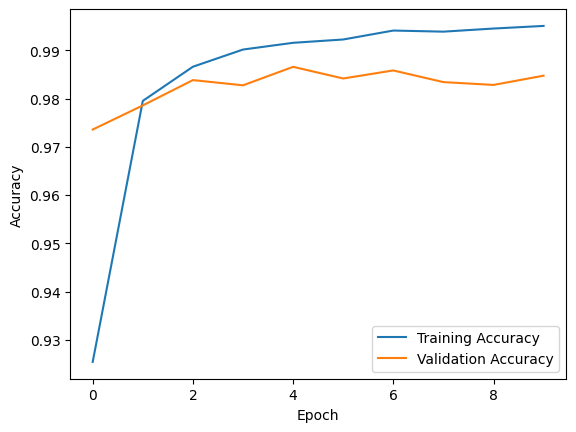

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')




plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
